In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
for chunk in pd.read_csv("../play2/WVS_TimeSeries_4_0.csv", chunksize=2000):
    appended = chunk[['version','doi','S002VS','S003','COUNTRY_ALPHA','COW_NUM','COW_ALPHA','tradrat5', 'survself']]
    df = pd.concat([df, appended])


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.describe()

,S002VS,S003,COW_NUM,tradrat5,survself
count,450869.000000,450869.000000,450869.000000,299114.000000,299114.000000
mean,4.812713,460.859678,448.596413,-0.128217,-0.040423
std,1.712464,259.587747,262.822617,0.996214,0.959362
min,1.000000,8.000000,2.000000,-2.263708,-3.265755
25%,3.000000,231.000000,225.000000,-0.893614,-0.718034
50%,5.000000,458.000000,380.000000,-0.233454,-0.133174
75%,6.000000,705.000000,702.000000,0.540779,0.554053
max,7.000000,909.000000,920.000000,4.397878,3.287141


In [ ]:
df.to_csv("../play2/wvs4.0_culture.csv", index=False)

In [3]:
df_feature = pd.read_csv("../play2/WVS_TimeSeries_4_0_filtered_col.csv")

In [4]:
df_feature.shape

(450869, 17)

In [5]:
df.shape

(422000, 9)

In [6]:
# merge df_feature to df by concatenating it as new columns
df = pd.concat([df, df_feature], axis=1)

In [7]:
training_data = df.dropna(subset=['tradrat5', "survself"])

In [8]:
training_data.columns

Index(['version', 'doi', 'S002VS', 'S003', 'COUNTRY_ALPHA', 'COW_NUM',
       'COW_ALPHA', 'tradrat5', 'survself', 'version', 'doi', 'S002VS', 'S003',
       'COUNTRY_ALPHA', 'COW_NUM', 'COW_ALPHA', 'A008', 'A165', 'E018', 'E025',
       'F063', 'F118', 'F120', 'G006', 'Y002', 'Y003'],
      dtype='object')

In [43]:
training_data.shape

(278829, 26)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming training_data is already defined and contains the necessary columns

# List of feature column names
feature_col = [
    'A008', 'A165', 'E018', 'E025', 'F063',
    'F118', 'F120', 'G006', 'Y003', 'Y002'
]

# Target columns
y_tradrat = training_data['tradrat5']
y_survival = training_data['survself']

# Feature matrix
X = training_data[feature_col]

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Model for 'tradrat5'
model_tradrat = LinearRegression()
model_tradrat.fit(X_normalized, y_tradrat)

# Model for 'survself'
model_survival = LinearRegression()
model_survival.fit(X_normalized, y_survival)


LinearRegression()

In [13]:
model_tradrat.score(X_normalized, y_tradrat)

1.0

In [14]:
df_real = pd.read_csv("../data/real_survey_answers.csv")

In [53]:
df_real['Nigeria'].values

array([ 1.89132198,  1.87317073,  1.09967585,  2.59098639,  9.45998383,
        1.5       ,  1.70870627,  1.42880259, -0.77445432,  1.79915254])

In [15]:
country_column = ["Nigeria", "Indonesia", "China", "USA", "Russia", "Ecuador", "Egypt"]
results = []
for count in country_column:
    X_scaled = scaler.transform([df_real[count].values])
    trad_val, surv_val = model_tradrat.predict(X_scaled)[0], model_survival.predict(X_scaled)[0]
    results.append([trad_val, surv_val])

/home/haryoaw/mambaforge/envs/sensei/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/haryoaw/mambaforge/envs/sensei/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/haryoaw/mambaforge/envs/sensei/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/haryoaw/mambaforge/envs/sensei/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/haryoaw/mambaforge/envs/sensei/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  

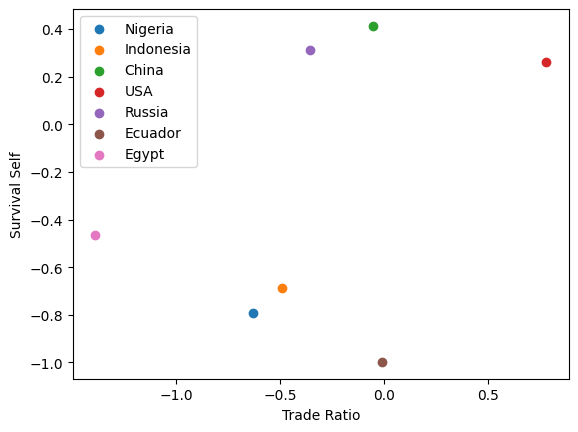

In [16]:
# create scatterplot for each country
import matplotlib.pyplot as plt

for i, count in enumerate(country_column):
    plt.scatter(results[i][1], results[i][0], label=count)
plt.xlabel("Trade Ratio")
plt.ylabel("Survival Self")
plt.legend()
plt.show()


In [57]:
trad_val, surv_val

(0.26392853874669786, 0.7783819642377918)

In [20]:
df_llm_scores = pd.read_csv("../scores/real_scores.csv")

In [21]:
df_llm_scores

,Question,non-en-SAILOR-prompt3,ind-MISTRAL-prompt1,ecu-SAILOR-prompt2,hau-QWEN-prompt1,egp-QWEN-prompt1,non-id-MISTRAL-prompt2,non-rus-GEMMA-prompt1,hau-SAILOR-prompt2,non-ecu-MISTRAL-prompt1,...,ch-SAILOR-prompt2,rus-SAILOR-prompt3,non-ecu-QWEN-prompt1,non-rus-GEMMA-prompt3,en-GEMMA-prompt2,ind-GEMMA-prompt3,egp-llama3-prompt3,non-ch-SAILOR-prompt2,egp-QWEN-prompt3,en-llama3-prompt3
0,happiness-q46,4,3,1,3,4,2,1,4,3,...,2,2,2,1,1,1,4,2,4,4
1,trust-q57,1,1,1,2,2,1,1,2,1,...,1,2,1,1,1,1,2,1,2,2
2,authority-q45,2,2,2,2,2,3,3,2,1,...,1,1,2,3,1,1,2,1,2,2
3,petition-q209,1,3,3,2,3,2,1,2,2,...,1,3,3,1,2,1,3,1,3,3
4,god-q164,10,3,10,10,10,10,1,10,10,...,1,10,10,2,1,1,1,1,10,1
5,homosexuality-q182,10,1,10,10,10,1,1,1,10,...,10,10,10,2,1,2,1,10,8,1
6,abortion-q184,1,1,10,10,10,1,1,1,1,...,10,10,10,2,1,1,1,10,10,1
7,proud-q254,4,3,1,4,4,2,1,4,2,...,1,2,4,1,1,1,4,1,4,4
8,child-obey1-q8,0,0,0,2,0,0,-1,2,0,...,0,1,0,-1,-1,-2,-2,0,0,1
9,materialistic-q155,3,4,3,3,4,4,2,3,3,...,2,3,3,2,2,1,4,2,4,3


In [22]:
import re

In [23]:
df_llm_scores.columns

Index(['Question', 'non-en-SAILOR-prompt3', 'ind-MISTRAL-prompt1',
       'ecu-SAILOR-prompt2', 'hau-QWEN-prompt1', 'egp-QWEN-prompt1',
       'non-id-MISTRAL-prompt2', 'non-rus-GEMMA-prompt1', 'hau-SAILOR-prompt2',
       'non-ecu-MISTRAL-prompt1',
       ...
       'ch-SAILOR-prompt2', 'rus-SAILOR-prompt3', 'non-ecu-QWEN-prompt1',
       'non-rus-GEMMA-prompt3', 'en-GEMMA-prompt2', 'ind-GEMMA-prompt3',
       'egp-llama3-prompt3', 'non-ch-SAILOR-prompt2', 'egp-QWEN-prompt3',
       'en-llama3-prompt3'],
      dtype='object', length=217)

In [24]:
pattern_en = re.compile(fr"non-(.+)-(.+)-prompt1")
dict_model_score = {}
print(pattern_en)

for column in df_llm_scores.columns:
    # print(column, end=' ')
    if pattern_en.match(column):
        match = pattern_en.match(column)
        curr_index = df_llm_scores[column]
        # change index curr_index to feature_col
        curr_index.index = feature_col
        if match.group(2) == "GEMMA":
            continue
        dict_model_score[match.group(1) + "-" + match.group(2)] = df_llm_scores[column]


re.compile('non-(.+)-(.+)-prompt1')


In [25]:
names = []
scores = []

for key, val in dict_model_score.items():
    X_scaled = scaler.transform(pd.DataFrame(val).T)
    trad_val, surv_val = model_tradrat.predict(X_scaled)[0], model_survival.predict(X_scaled)[0]
    names.append(key)
    scores.append([trad_val, surv_val])

In [29]:
df_llm = pd.DataFrame(dict(name=names, score=scores))

In [31]:
df_real = pd.DataFrame(dict(name=country_column, score=results))

In [35]:
# For each df_llm.score, calculate the highest score from df_real and obtain the nearest one score and the country name
from scipy.spatial.distance import euclidean

nearest_country = []
nearest_score = []
nearest_distance = []
for i, score in enumerate(df_llm.score):
    min_distance = float('inf')
    min_index = 0
    for j, real_score in enumerate(df_real.score):
        distance = euclidean(score, real_score)
        if distance < min_distance:
            min_distance = distance
            min_index = j
    nearest_country.append(df_real.name[min_index])
    nearest_score.append(df_real.score[min_index])
    nearest_distance.append(min_distance)

In [41]:
# assign to df_llm

df_llm['nearest_country'] = nearest_country
df_llm['nearest_score'] = nearest_score
df_llm['nearest_distance'] = nearest_distance

df_llm.sort_values(by=['name']).loc[df_llm['name'].str.contains("QWEN"), :]

,name,score,nearest_country,nearest_score,nearest_distance
6,ch-QWEN,"[0.4624353814913384, 1.9164807598325315]",USA,"[0.26392853874669525, 0.7783819642377918]",1.155281
23,ecu-QWEN,"[1.4632797150484975, 0.8072178024393153]",USA,"[0.26392853874669525, 0.7783819642377918]",1.199698
21,egp-QWEN,"[2.571793378288621, -0.401472335535525]",China,"[0.41343379792134366, -0.05566132820289699]",2.185887
3,en-QWEN,"[2.5958038985871528, -1.1790373024089584]",Russia,"[0.3108981571189704, -0.35674012912813513]",2.428367
11,hau-QWEN,"[2.572437339377253, -0.1558049281911455]",China,"[0.41343379792134366, -0.05566132820289699]",2.161325
15,id-QWEN,"[0.7806704728547631, -0.09693246054202215]",China,"[0.41343379792134366, -0.05566132820289699]",0.369548
5,ind-QWEN,"[1.687443721662385, 0.003935307627079554]",China,"[0.41343379792134366, -0.05566132820289699]",1.275403
7,rus-QWEN,"[0.1961145970310622, 0.8425201650001224]",USA,"[0.26392853874669525, 0.7783819642377918]",0.093340


In [33]:
df_real

,name,score
0,Nigeria,"[-0.7935633877238584, -0.6291279393084257]"
1,Indonesia,"[-0.6877696742690642, -0.4929277440731686]"
2,China,"[0.41343379792134366, -0.05566132820289699]"
3,USA,"[0.26392853874669525, 0.7783819642377918]"
4,Russia,"[0.3108981571189704, -0.35674012912813513]"
5,Ecuador,"[-0.998287557025497, -0.01048130173253968]"
6,Egypt,"[-0.4638113691217754, -1.3884737045074527]"


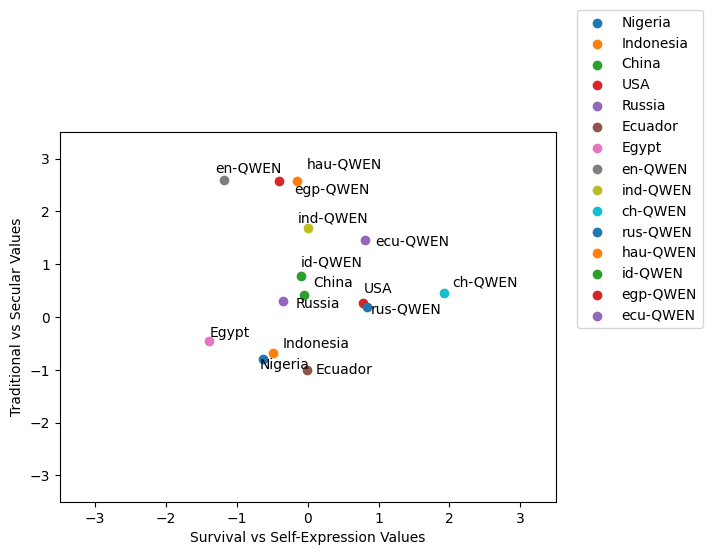

In [38]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Example data setup, assuming `country_column`, `results`, and `scores` are defined

# Prepare lists to hold the texts and points for adjustText
texts = []

# Filter to display points and labels for "Indonesia"
for i, count in enumerate(country_column):
    x, y = results[i][1], results[i][0]
    plt.scatter(x, y, label=count)
    # Create annotation and add to the list
    texts.append(plt.text(x, y, count))

# Another filter to display points and labels for names containing "SAILOR"
filter_name = "QWEN"
for i, count in enumerate(names):
    if filter_name in count:
        x, y = scores[i][1], scores[i][0]
        plt.scatter(x, y, label=count)
        # Create annotation and add to the list
        texts.append(plt.text(x, y, count))

# Set axis labels
plt.xlabel("Survival vs Self-Expression Values")
plt.ylabel("Traditional vs Secular Values")

# Set axis limits
plt.xlim(-3.50, 3.50)  # X-axis range
plt.ylim(-3.50, 3.50)  # Y-axis range

# Adjust the positions of texts to avoid overlaps
adjust_text(texts)

# Display legend outside the plot area
plt.legend(bbox_to_anchor=(1.31, 1.35))

# Show the plot
plt.show()
